# Project 2

Alice Ding, Shoshana Farber, Christian Uriostegui

The goal of this project is to:

1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?

The dataset we are using is from the Bureau of Transporation Statistics, specifically from the Airline Origin and Destination (DB1B) [database](https://www.transtats.bts.gov/TableInfo.asp?gnoyr_VQ=FHK&QO_fu146_anzr=b4vtv0%20n0q%20Qr56v0n6v10%20f748rB&V0s1_b0yB=D). The dataset used can be found in the [GitHub folder Week 4 - Part 1](https://github.com/addsding/cuny-data620/tree/main/week4_part1) assignment.  Because the dataset exceeds a million rows, we will be looking a smaller subset of data for practical purposes. The full original dataset can be found [here](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FHK&QO_fu146_anzr=b4vtv0+n0q+Qr56v0n6v10+f748rB). 

The dataset contains information on the origin and destination markets provided in the Origin and Destination Survey (DB1B). This is a 10% sample of airline ticket purchases from carriers. In addition, you can find information on the number of passengers, as well as origin and destination airlines. This information is recorded each quarter and has been reported since 1993. 

For our analysis, we will be looking at data from 2022 in the first quarter. We are interested in examining popular destination places by airline companies in the United States.

***

### Loading the Data

In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

In [2]:
survey = pd.read_csv('https://raw.githubusercontent.com/addsding/cuny-data620/main/week4_part1/T_DB1B_MARKET_1.csv')

In [3]:
survey.head(15)

,ITIN_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_STATE_ABR,DEST_STATE_NM,REPORTING_CARRIER,PASSENGERS
0,2022149,10868,1086803,30868,CAE,SC,South Carolina,13204,1320402,31454,MCO,FL,Florida,3M,1
1,2022150,10868,1086803,30868,CAE,SC,South Carolina,13204,1320402,31454,MCO,FL,Florida,3M,1
2,2022151,10868,1086803,30868,CAE,SC,South Carolina,13204,1320402,31454,MCO,FL,Florida,3M,1
3,2022151,13204,1320402,31454,MCO,FL,Florida,10868,1086803,30868,CAE,SC,South Carolina,3M,1
4,2022152,10868,1086803,30868,CAE,SC,South Carolina,13204,1320402,31454,MCO,FL,Florida,3M,1
5,2022152,13204,1320402,31454,MCO,FL,Florida,10868,1086803,30868,CAE,SC,South Carolina,3M,1
6,2022153,10868,1086803,30868,CAE,SC,South Carolina,11697,1169706,32467,FLL,FL,Florida,3M,1
7,2022154,10868,1086803,30868,CAE,SC,South Carolina,15304,1530402,33195,TPA,FL,Florida,3M,1
8,2022155,10868,1086803,30868,CAE,SC,South Carolina,15304,1530402,33195,TPA,FL,Florida,3M,1
9,2022156,10868,1086803,30868,CAE,SC,South Carolina,15304,1530402,33195,TPA,FL,Florida,3M,1


Our dataframe titled **survey** contains the following columns:
- `ITIN_ID`- This contains the unique itenary ID for each flight
- `ORIGIN_AIRPORT_ID` - Origin airport id
- `ORIGIN_AIRPORT_SEQ_ID` - Origin airport sequence id
- `ORIGIN_CITY_MARKET_ID` - Origin city market
- `ORIGIN` - Origin airport code
- `ORIGIN_STATE_ABR` - Origin state abbreviation
- `ORIGIN_STATE_NM`- Origin state full name
- `DEST_AIRPORT_ID` - Destination airport id
- `DEST_AIRPORT_SEQ_ID` - Destination airport sequence id
- `DEST_CITY_MARKET_ID` -Destination city market id
- `DEST` - Destination airport code
- `DEST_STATE_ABR` - Destination state abbreviation
- `DEST_STATE_NM` - Destination state name
- `REPORTING_CARRIER` - Reporting carrier code (3M = Silver Airways, 9E = Endeavor Air Inc., AA = American Airlines Inc.)
- `PASSENGERS` - Number of passengers traveling per itinerary

For our analysis, we will be examining the columns `ORIGIN` and `DEST_STATE_ABR`.
***

### Exploratory Analysis
**What are the airports and destination states in the dataset?**

In [4]:
print("There are",len(survey['ORIGIN'].unique()), "airports and they are", survey['ORIGIN'].unique(),"\n")
print("There are",len(survey['DEST_STATE_ABR'].unique()), "destination states and they are", survey['DEST_STATE_ABR'].unique())

There are 297 airports and they are ['CAE' 'MCO' 'CHS' 'FLL' 'TPA' 'EYW' 'PNS' 'HSV' 'JAX' 'SAV' 'TLH' 'GSP'
 'IAD' 'IAH' 'MSY' 'LAX' 'ATL' 'COS' 'ORD' 'SJU' 'STT' 'STX' 'EWR' 'ABE'
 'ABQ' 'AGS' 'ATW' 'AUS' 'AVL' 'BHM' 'BMI' 'BNA' 'BOI' 'BZN' 'CHA' 'CLE'
 'CMH' 'CRW' 'CSG' 'DAB' 'DAL' 'DEN' 'DFW' 'ELP' 'DHN' 'DSM' 'ECP' 'EVV'
 'GNV' 'GPT' 'GSO' 'DTW' 'HHH' 'HNL' 'HOU' 'ICT' 'JAN' 'PBI' 'LAS' 'LEX'
 'LFT' 'LIT' 'MCI' 'MDW' 'MEM' 'MGM' 'MIA' 'MKE' 'MLB' 'MLU' 'BTR' 'MOB'
 'MSP' 'MYR' 'OKC' 'OMA' 'ONT' 'PDX' 'PHX' 'PSP' 'RDU' 'RSW' 'SAN' 'SAT'
 'SDF' 'SEA' 'MFR' 'SFO' 'SGF' 'SHV' 'SLC' 'OAK' 'SMF' 'SNA' 'SRQ' 'STL'
 'TUL' 'TUS' 'TYS' 'VPS' 'CVG' 'GRB' 'GRR' 'IND' 'LAN' 'MBS' 'MSN' 'GEG'
 'PIT' 'ABY' 'ALB' 'BDL' 'BOS' 'LGA' 'BWI' 'CLT' 'DAY' 'DCA' 'JFK' 'HDN'
 'HPN' 'LBB' 'JAC' 'MDT' 'MTJ' 'OAJ' 'ORF' 'PHL' 'RIC' 'ROC' 'FAI' 'SYR'
 'AEX' 'BQK' 'ELM' 'FAY' 'FWA' 'ILM' 'PWM' 'ANC' 'PSC' 'PVD' 'TRI' 'VLD'
 'ASE' 'SLK' 'BTV' 'BUF' 'EGE' 'FSD' 'LIH' 'RNO' 'SJC' 'MLI' 'BIL' 'BJI'
 'CWA' 'DLH' 'F

Now that we know about the airports and destination places in the data, we can look at the frequency for each column.
***
**Which airports has the most trips?**

In [5]:
survey.groupby('ORIGIN').count().iloc[:, 0].sort_values(ascending=False).head()

ORIGIN
BOS    22031
AUS    14605
ATL    13838
CLT    13164
LGA    11916
Name: ITIN_ID, dtype: int64

Boston Logan International Airport (BOS) had the most trips, with **22,031** flights originating from there. Austin International Airport (AUS), Atlanta International Airport (ATL), Charlotte Douglas in North Carolina (CLT), and LaGuardia Airport in New York (LGA) also appear in the top five, with **over 10,000** flights originating from these airports. 

***

**What is the most frequently visited destination?**

In [6]:
survey.groupby('DEST_STATE_ABR').count().iloc[:,0].sort_values(ascending=False).head()

DEST_STATE_ABR
FL    31049
NY    26804
TX    22762
NC    18130
MA    16062
Name: ITIN_ID, dtype: int64

The most frequent destination is Florida with **31,049**, and next is New York with **26,804**.
***

### Creating the Network

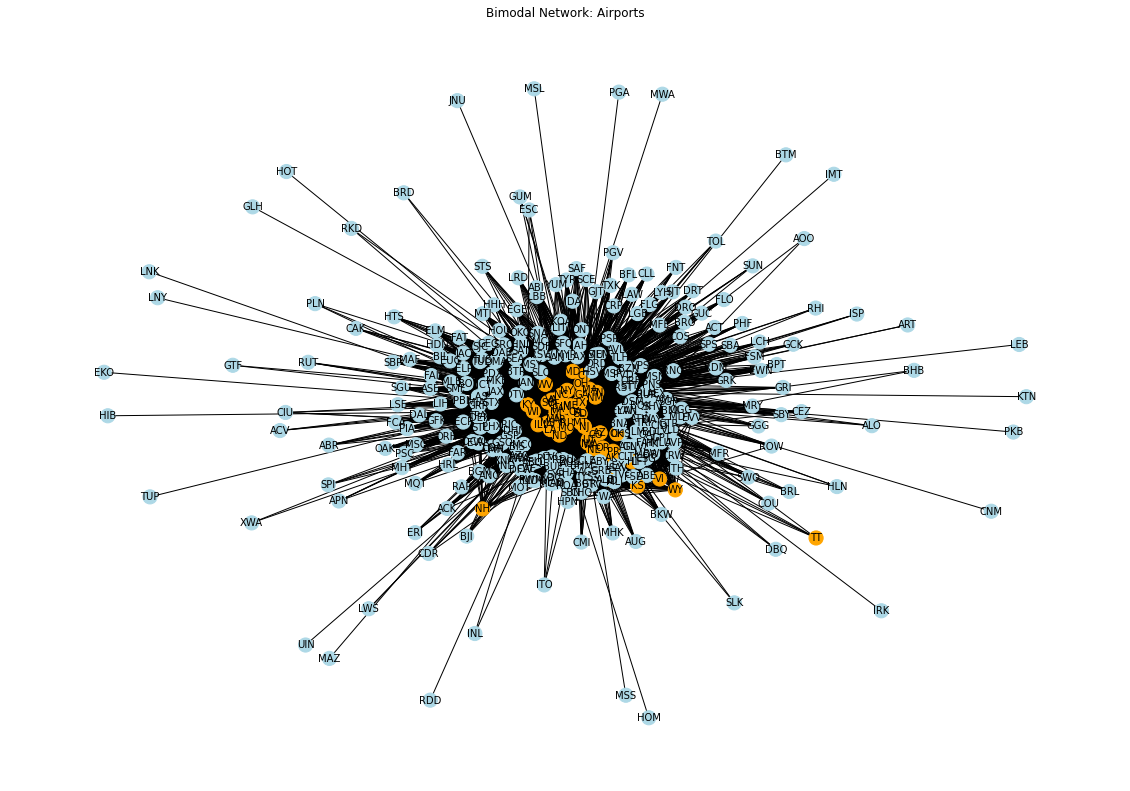

In [7]:
plt.figure(figsize=(20,14))

# Create an empty graph
G = nx.Graph()

# Iterate over the data rows
for _, row in survey.iterrows():
    airport = row['ORIGIN']
    dest = row['DEST_STATE_ABR']

    # Add the nodes and edges to the graph
    G.add_node(airport, bipartite=0)  # Airport nodes
    G.add_node(dest, bipartite=1)  # Destination state nodes
    G.add_edge(airport, dest)  # Edge between airport and destination

# Network visualization
pos = nx.random_layout(G)
node_color = ['lightblue' if d['bipartite'] == 0 else 'orange' for _, d in G.nodes(data=True)]  # use colors to differentiate airport (blue) from state (orange)
nx.draw_networkx(G,node_size=200, font_size=10, node_color=node_color)


plt.title("Bimodal Network: Airports")
plt.axis("off")
plt.show()

Let's confirm that graph object G is in a bipartite format.

In [8]:
nx.is_bipartite(G)

True

In [9]:
nx.info(G)

C:\Users\Shoshana\AppData\Local\Temp\ipykernel_7028\1064119803.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 349 nodes and 7133 edges'

In [10]:
def centrality(graph):
    # calculate each of the values for each node
    degree = nx.degree(graph)
    degree_weighted = nx.degree(graph, weight = 'weight')
    degree_c = nx.degree_centrality(graph)
    between_c = nx.betweenness_centrality(graph)
    closeness_c = nx.closeness_centrality(graph)
    #eigen_c = nx.eigenvector_centrality(graph, weight = 'weight') 

    # create a list for each node with all the data points
    data = [[name
             , degree[name]
             , degree_weighted[name]
             , round(degree_c[name], 3)
             , round(between_c[name], 3)
             , round(closeness_c[name], 3)] 
             for name in graph.nodes()]
    
    # turn this into a dataframe
    centrality_df = pd.DataFrame(data
                                 , columns = ['name', 'degree', 'weighted_degree', 'degree centrality'
                                              , 'betweenness', 'closeness'])
    
    # return the dataframe
    return centrality_df

centrality(G).sort_values(by = ['degree'], ascending = False)

,name,degree,weighted_degree,degree centrality,betweenness,closeness
10,GA,249,249,0.716,0.078,0.703
19,TX,243,243,0.698,0.070,0.686
51,TN,242,242,0.695,0.072,0.684
14,NC,231,231,0.664,0.065,0.655
12,MA,220,220,0.632,0.053,0.629
...,...,...,...,...,...,...
263,IMT,1,1,0.003,0.000,0.339
264,EKO,1,1,0.003,0.000,0.349
315,PKB,1,1,0.003,0.000,0.413
265,RDD,1,1,0.003,0.000,0.333


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([348.5, 348.6, 348.7, 348.8, 348.9, 349. , 349.1, 349.2, 349.3,
        349.4, 349.5]),
 <BarContainer object of 10 artists>)

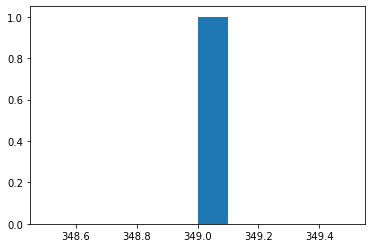

In [11]:
x=[len(c) for c in nx.connected_components(G)]
plt.hist(x)

In [12]:
[len(c) for c in nx.connected_components(G) if len(c) > 34.99]


[349]

In [13]:
components = nx.connected_components(G)
for component in components:
    print("Connected component size:", len(component))

Connected component size: 349


All of the nodes are connected, so there are no separate components to filter out from this dataset.

Let's try adding a weight to the edges based on the number of trips from one airport to a location. To do this, let's first create a new data frame with just the origin airport and the destination state.

In [14]:
subset = survey[['ORIGIN', 'DEST_STATE_ABR']]

grouped = subset.groupby(subset.columns.tolist())

count = grouped.size().reset_index(name = 'count')

subset_weighted = pd.merge(subset, count, on = subset.columns.tolist(), how='left').drop_duplicates()

subset_weighted.sort_values('count', ascending=False).head()

,ORIGIN,DEST_STATE_ABR,count
22951,BOS,FL,4857
39706,CLT,TX,2374
23286,BOS,TX,2297
23375,BOS,CA,2200
17086,AUS,FL,2114


Now let's recreate the network and add weights to the edges. 

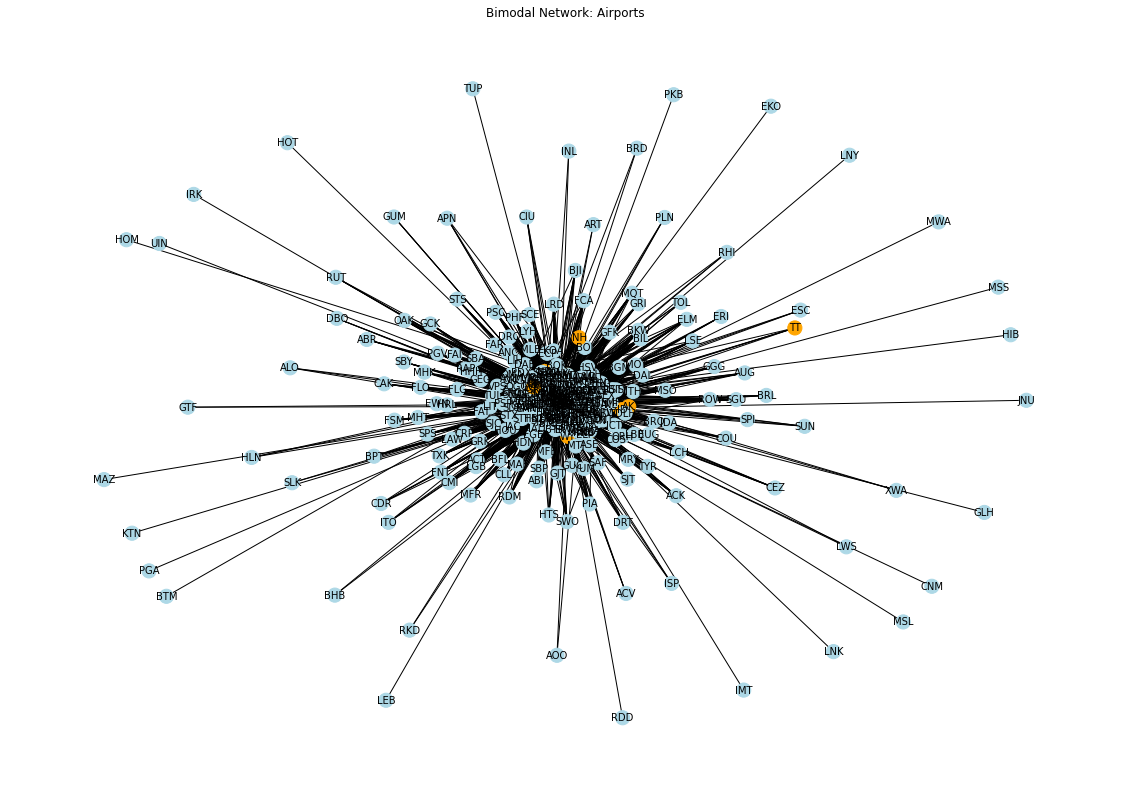

In [90]:
plt.figure(figsize=(20,14))

# Create an empty graph
test = nx.Graph()

# Add the nodes and edges to the graph
G.add_nodes_from(subset_weighted['ORIGIN'], bipartite=0)  # Airport nodes
G.add_nodes_from(subset_weighted['DEST_STATE_ABR'], bipartite=1)  # Destination state nodes
G.add_weighted_edges_from(list(zip(subset_weighted['ORIGIN'], subset_weighted['DEST_STATE_ABR'], subset_weighted['count'])))  # Edge between airport and destination

# 1. Network visualization
pos = nx.spring_layout(G)

color_dict = {}
for key, value in G.nodes(data=True):
    if value['bipartite'] == 0:
        color_dict[key] = 'lightblue'
    else:
        color_dict[key] = 'orange'

nx.draw_networkx(G, pos, node_size=200, font_size=10, node_color=color_dict.values())


plt.title("Bimodal Network: Airports")
plt.axis("off")
plt.show()

Let's add colors and edge thickness based on weight.

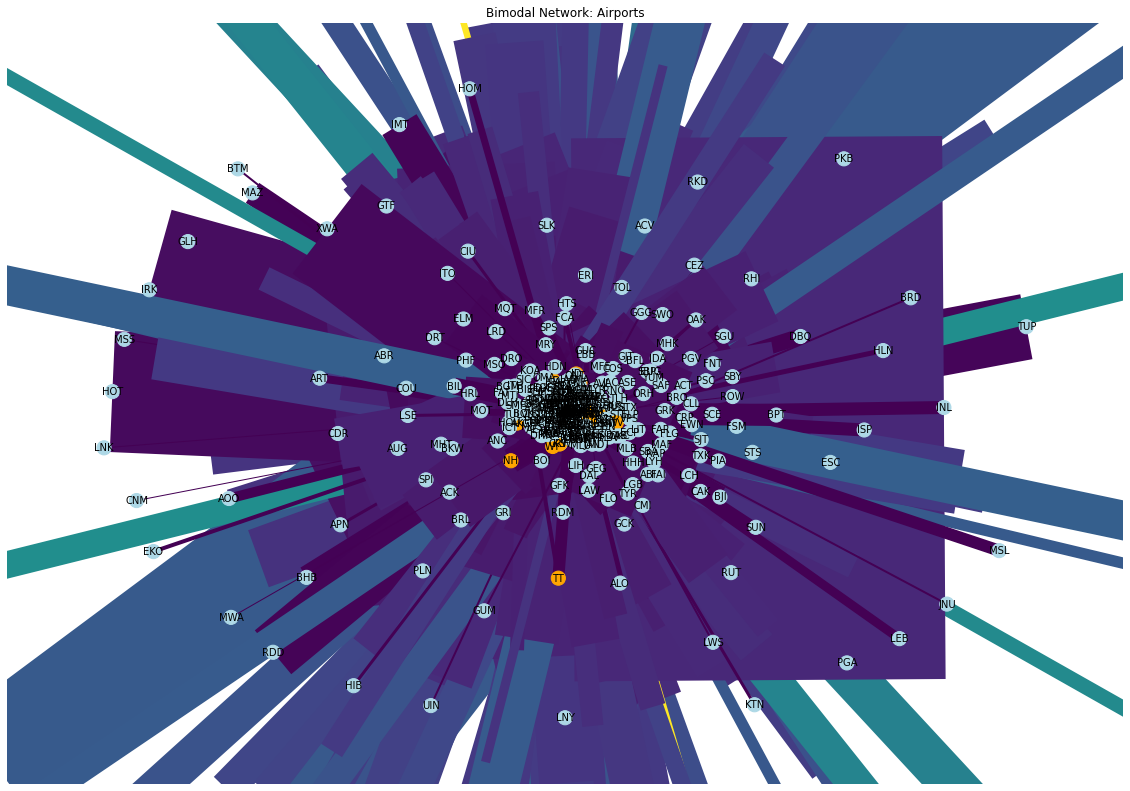

In [98]:
plt.figure(figsize=(20,14))

weights = subset_weighted['count']
nx.draw_networkx(G, node_size=200, font_size=10, node_color=color_dict.values(), width = weights, edge_color = weights)

plt.title("Bimodal Network: Airports")
plt.axis("off")
plt.show()

Some of the edge weights are extremely large. Let's create the graph using the log of the weights so that the connections can be seen clearer. 

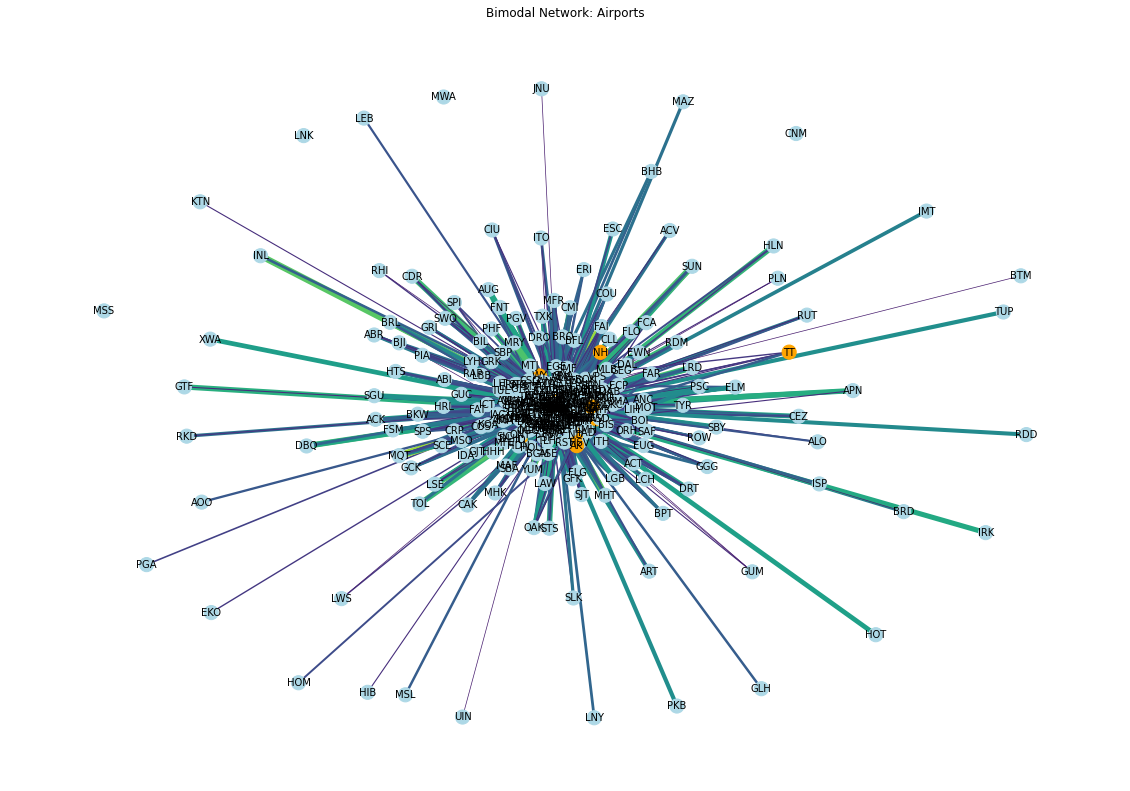

In [26]:
plt.figure(figsize=(20,14))

weights = np.log(subset_weighted['count'])
nx.draw_networkx(G, node_size=200, font_size=10, node_color=color_dict.values(), width = weights, edge_color = weights)

plt.title("Bimodal Network: Airports")
plt.axis("off")
plt.show()

Some edges are not visible in the new graph, so those connections are not very strong. We can see the strength of the connections from the thickness of the edges connecting the nodes. 

Now let's implement the island method from the SNA textbook. 

In [71]:
# SNA function for trimming edges
def trim_edges(g, weight=1):
    g2 = nx.Graph()
    edges = []

    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            edges.append([f, to, edata['weight']])
        
    g2.add_weighted_edges_from(edges)
    return g2

# SNA function for island method
def island_method(g, iterations = 5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]

    mn = int(min(weights))
    mx = int(max(weights))
    step = int((mx-mn)/iterations)

    return[[threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step)]

The `nx.connected_component_subgraphs()` function which is mentioned in the book is depracated in the newest version of **NetworkX**. Documentation for `nx.connected_components()`, which is the updated version of this function, can be found [here](https://networkx.org/documentation/stable/reference/algorithms/component.html).

Let's generate the connected components of our network.

In [72]:
cc = [G.subgraph(c).copy() for c in nx.connected_components(G)]

We can now isolate the largest component of our network and separate it into subparts using the `island_method()` function defined above.

In [73]:
islands = island_method(cc[0])

for i in islands:
    print(i[0], nx.number_of_nodes(i[1]), nx.number_connected_components(i[1]))

1 313 1
972 23 2
1943 6 1
2914 2 1
3885 2 1
4856 2 1


With a threshold of 972, there exists two compoenents consisting of 23 nodes. These are the aiports and states with the most travel between them. 

Now we can graph the smaller network. 

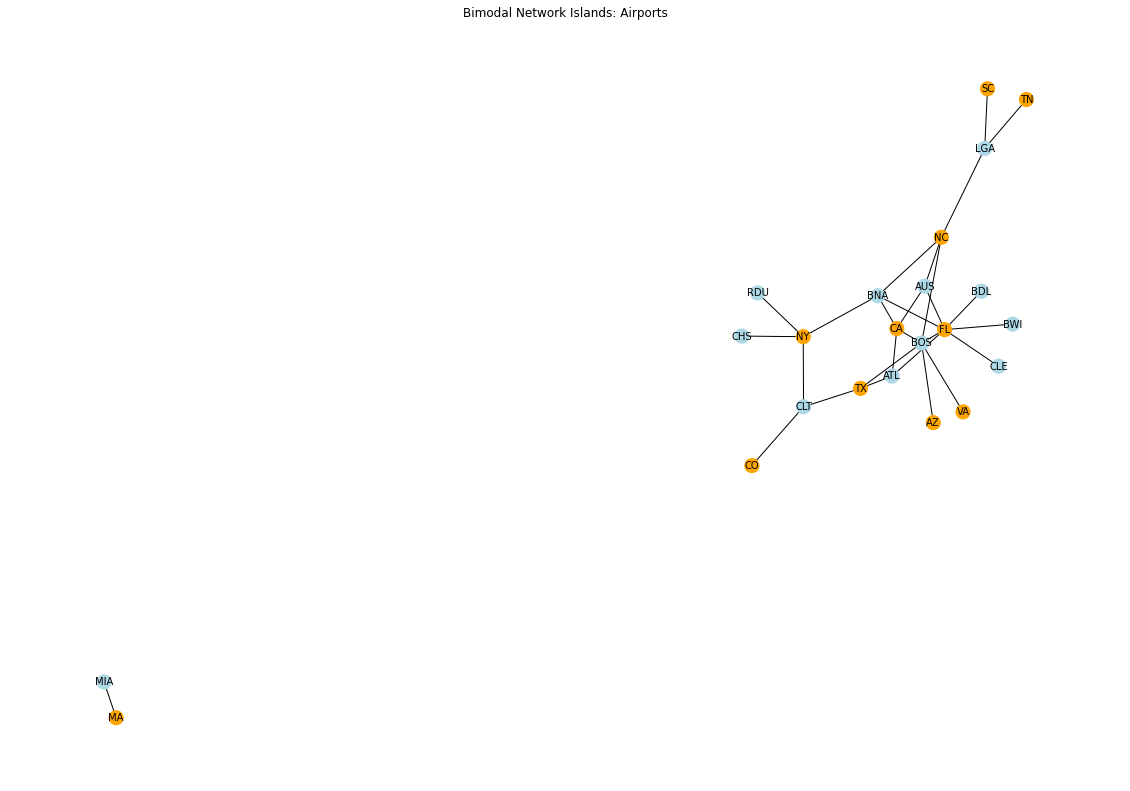

In [113]:
plt.figure(figsize=(20,14))

sub_color_dict = {key: value for key, value in color_dict.items() if key in islands[1][1].nodes()}
sub_color_dict = {key: sub_color_dict[key] for key in islands[1][1].nodes()}

nx.draw_networkx(islands[1][1], node_size=200, font_size=10, node_color=sub_color_dict.values())

plt.title("Bimodal Network Islands: Airports")
plt.axis("off")
plt.show()

From this smaller subset of the airport network, we can see that Boston Logan International Airport (BOS) has the most flights to the most states and Florida (FL) has the most flights from the most airports. 